In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Config

In [3]:
df = pd.read_csv('../Data/train.csv')

# 5가지 변수 추출
# bant_submit : MQL 구성 요소들 중 [1]Budget(예산), [2]Title(고객의 직책/직급), [3]Needs(요구사항), [4]Timeline(희망 납기일) 4가지 항목에 대해서 작성된 값의 비율
# com_reg_ver_win_rate : Vertical Level 1, business unit, region을 기준으로 oppty 비율을 계산
# historical_existing_cnt : 이전에 Converted(영업 전환) 되었던 횟수
# response_corporate : 담당 자사 법인명
# lead_owner : 영업 담당자 이름
df = df.iloc[:,[0,3,7,19,27,-1]]
df.head()

,bant_submit,com_reg_ver_win_rate,historical_existing_cnt,response_corporate,lead_owner,is_converted
0,1.0,0.066667,NaN,LGEPH,0,True
1,1.0,0.066667,12.0,LGEPH,1,True
2,1.0,0.088889,144.0,LGEIL,2,True
3,1.0,0.088889,NaN,LGEIL,3,True
4,1.0,0.088889,NaN,LGEIL,4,True


In [4]:
# 결측 확인
df.isna().sum()

bant_submit                    0
com_reg_ver_win_rate       44731
historical_existing_cnt    45543
response_corporate             0
lead_owner                     0
is_converted                   0
dtype: int64

# bant_submit

### <EDA 요약>  
MQL 구성 요소들 중 [1]Budget(예산), [2]Title(고객의 직책/직급), [3]Needs(요구사항), [4]Timeline(희망 납기일) 4가지 항목에 대해서 작성된 값의 비율  
예산, 고객 직책, 요구사항, 납기일 중 '작성된 개수/4'를 표시한 값.  
(0.00, 0.25, 0.50, 0.75, 1.00 총 5개 class인 순서형 변수라고 볼 수 있다.)  
  
총평 : 변수가 크게 필요없을 것 같다.  
이유 :  
1) 위 네 가지 요소가 실제 중요한 지표인지에 대한 의문  
2) 위 네 가지 요소를 같은 비중(0.25)으로 반영  
3) 각 class 별 분포의 차이가 크지 않고, target(is_converted)의 비율 차이도 없다고 판단됨  
  
만약 네 가지 요소가 중요하다고 판단될 시에는 가중치를 반영하는 방식을 고려해볼 수 있을 듯.

## class 별 분포 확인

In [5]:
### count
df['bant_submit'].value_counts()

bant_submit
0.50    17192
1.00    17061
0.25    12852
0.75    11681
0.00      513
Name: count, dtype: int64

C:\Users\jku95\AppData\Local\Temp\ipykernel_30408\3664151805.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bant_submit', data=df, palette='viridis')


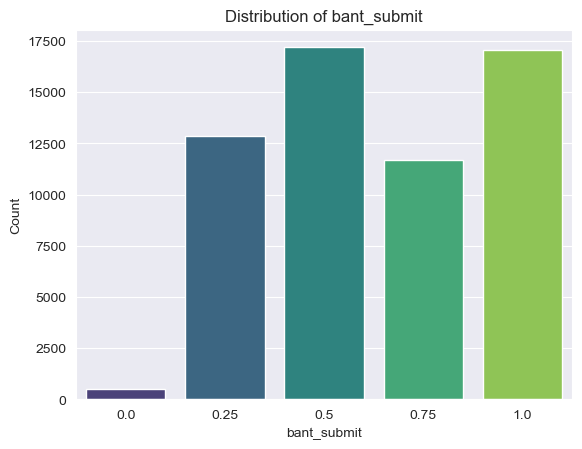

In [6]:
### count_plot
sns.countplot(x='bant_submit', data=df, palette='viridis')

plt.title('Distribution of bant_submit')
plt.xlabel('bant_submit')
plt.ylabel('Count')

plt.show()

In [7]:
variance = df['bant_submit'].var()
print(variance)

0.08183394833221207


## target 영향

C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categoric

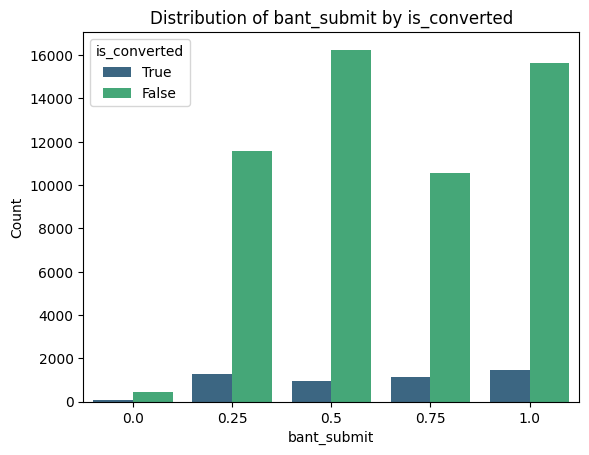

In [6]:
### bar plot
df['is_converted'] = df['is_converted'].astype(str)
sns.countplot(x='bant_submit', hue='is_converted', data=df, palette='viridis')

plt.title('Distribution of bant_submit by is_converted')
plt.xlabel('bant_submit')
plt.ylabel('Count')

plt.legend(title='is_converted', loc='upper left')

plt.show()

In [7]:
df['is_converted'] = df['is_converted'].apply(lambda x: x == 'True')

In [8]:
### True ratio
result = df.groupby('bant_submit')['is_converted'].value_counts(normalize=True).unstack()

print(result)

is_converted     False     True 
bant_submit                     
0.00          0.840156  0.159844
0.25          0.901027  0.098973
0.50          0.945498  0.054502
0.75          0.904375  0.095625
1.00          0.915480  0.084520


# com_reg_ver_win_rate

### <EDA 요약>  
Vertical Level 1, business unit, region을 기준으로 oppty 비율을 계산  
변수의 값에 따라 target(is_conveted)의 차이가 꽤 있는 편.  
결측값이 상당히 많은데, 결측값 중에서 구매가 이루어진 비율이 꽤 많은 상황.  
  
총평 : 단순 fillna(0)으로 처리하기 아쉽다. 결측값을 예측할 수 있으면 좋을 듯 함.

## 결측값 확인

In [9]:
df[df['com_reg_ver_win_rate'].isna()]['is_converted'].value_counts()

is_converted
False    41147
True      3584
Name: count, dtype: int64

## 분포 확인

In [10]:
### statistics
df['com_reg_ver_win_rate'].describe()

count    14568.000000
mean         0.091685
std          0.150988
min          0.003788
25%          0.019900
50%          0.049180
75%          0.074949
max          1.000000
Name: com_reg_ver_win_rate, dtype: float64

C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


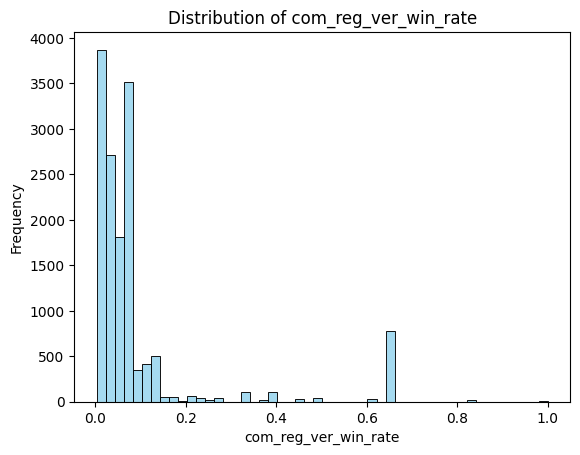

In [11]:
### histogram
sns.histplot(df['com_reg_ver_win_rate'], bins=50, kde=False, color='skyblue', edgecolor='black')
plt.xlabel('com_reg_ver_win_rate')
plt.ylabel('Frequency')
plt.title('Distribution of com_reg_ver_win_rate')
plt.show()

C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


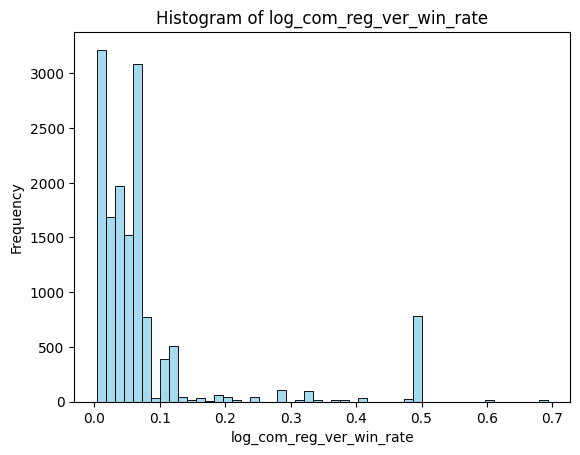

In [12]:
### log변환 후 histogram
df['log_com_reg_ver_win_rate'] = np.log1p(df['com_reg_ver_win_rate'])

sns.histplot(df['log_com_reg_ver_win_rate'], bins=50, kde=False, color='skyblue', edgecolor='black')
plt.xlabel('log_com_reg_ver_win_rate')
plt.ylabel('Frequency')
plt.title('Histogram of log_com_reg_ver_win_rate')
plt.show()

## target 영향

In [13]:
### 통계량 비교
converted_t = df[df['is_converted'] == True]['com_reg_ver_win_rate'].describe()
converted_f = df[df['is_converted'] == False]['com_reg_ver_win_rate'].describe()

combined_stats = pd.concat([converted_t, converted_f], axis=1)
combined_stats.columns = ['is_converted=True', 'is_converted=False']

print(combined_stats)

       is_converted=True  is_converted=False
count        1266.000000        13302.000000
mean            0.259350            0.075727
std             0.259115            0.125106
min             0.003788            0.003788
25%             0.057534            0.019608
50%             0.088889            0.047619
75%             0.642857            0.074949
max             1.000000            1.000000


C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


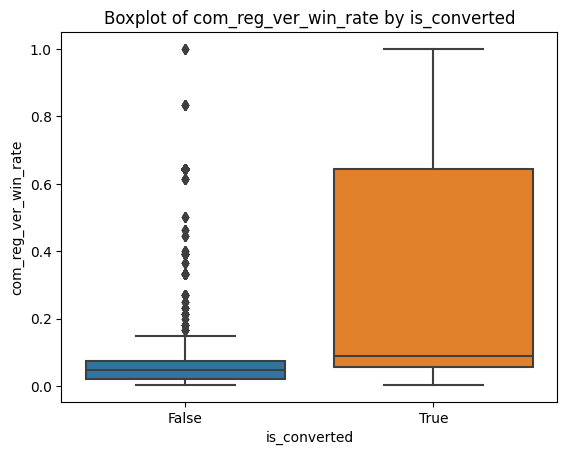

In [14]:
### Boxplot
sns.boxplot(x='is_converted', y='com_reg_ver_win_rate', data=df)
plt.xlabel('is_converted')
plt.ylabel('com_reg_ver_win_rate')
plt.title('Boxplot of com_reg_ver_win_rate by is_converted')
plt.show()

In [15]:
### 구간별 비교
df['com_reg_ver_win_rate_bins'] = pd.cut(df['com_reg_ver_win_rate'].to_numpy(), bins=5)

conversion_ratio_by_bin = df.groupby('com_reg_ver_win_rate_bins')['is_converted'].value_counts().unstack()

print(conversion_ratio_by_bin)

is_converted               False  True 
com_reg_ver_win_rate_bins              
(0.00279, 0.203]           12508    775
(0.203, 0.402]               279    111
(0.402, 0.602]                22     40
(0.602, 0.801]               477    329
(0.801, 1.0]                  16     11


C:\Users\Kyeongjun\AppData\Local\Temp\ipykernel_14860\3363842920.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_ratio_by_bin = df.groupby('com_reg_ver_win_rate_bins')['is_converted'].value_counts().unstack()


# historical_existing_cnt

### <EDA 요약>  
이전에 Converted(영업 전환) 되었던 횟수  
결측값이 상당히 많은데, 이전 영업전환이 0인 경우가 nan으로 표시된 건 아닌듯. (값이 0인 데이터가 존재)  
결측값 중에서 target(is_converted)의 T:F 비율은 1:10 수준  
  
총평 : 구매 빈도에 따라 구매 전환이 선형적으로 비례하진 않음

## 결측값 확인

In [16]:
df[df['historical_existing_cnt'].isna()]['is_converted'].value_counts()

is_converted
False    41361
True      4182
Name: count, dtype: int64

## 분포 확인

In [17]:
### statistics
df['historical_existing_cnt'].describe()

count    13756.000000
mean        19.912184
std         44.697938
min          0.000000
25%          1.000000
50%          4.000000
75%         19.000000
max       1394.000000
Name: historical_existing_cnt, dtype: float64

C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


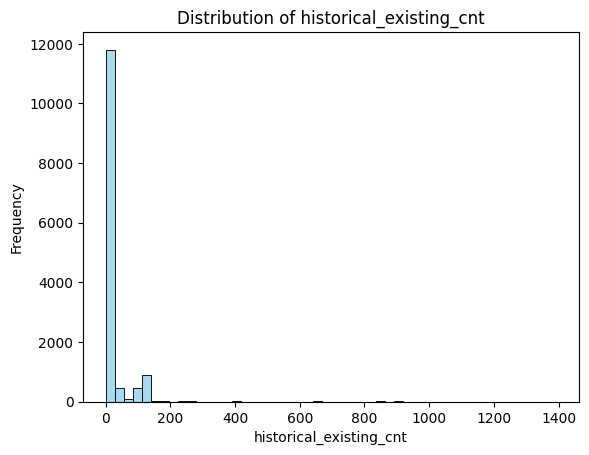

In [18]:
### histogram
sns.histplot(df['historical_existing_cnt'], bins=50, kde=False, color='skyblue', edgecolor='black')

plt.xlabel('historical_existing_cnt')
plt.ylabel('Frequency')
plt.title('Distribution of historical_existing_cnt')
plt.show()

C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


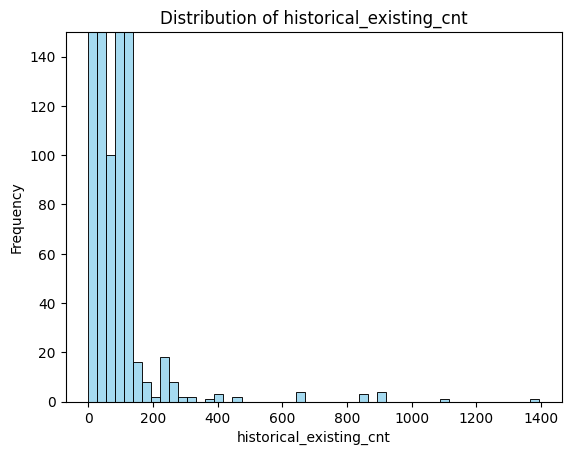

In [19]:
### histogram (y lim)
sns.histplot(df['historical_existing_cnt'], bins=50, kde=False, color='skyblue', edgecolor='black')
plt.ylim(0, 150)
plt.xlabel('historical_existing_cnt')
plt.ylabel('Frequency')
plt.title('Distribution of historical_existing_cnt')
plt.show()

C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


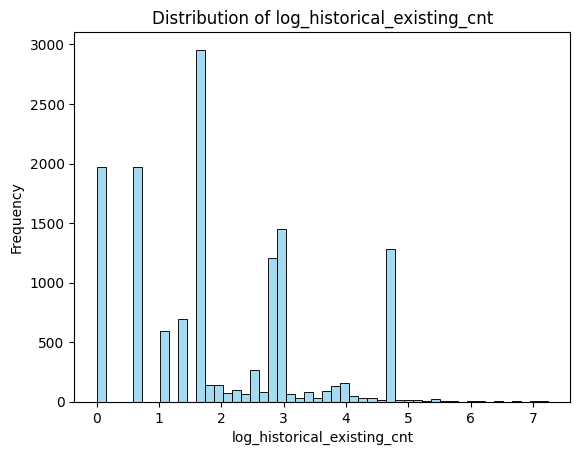

In [20]:
### log변환
df['log_historical_existing_cnt'] = np.log1p(df['historical_existing_cnt'])

sns.histplot(df['log_historical_existing_cnt'], bins=50, kde=False, color='skyblue', edgecolor='black')

plt.xlabel('log_historical_existing_cnt')
plt.ylabel('Frequency')
plt.title('Distribution of log_historical_existing_cnt')
plt.show()

In [21]:
## target 영향

In [22]:
### 통계량 비교
converted_t = df[df['is_converted'] == True]['historical_existing_cnt'].describe()
converted_f = df[df['is_converted'] == False]['historical_existing_cnt'].describe()

combined_stats = pd.concat([converted_t, converted_f], axis=1)
combined_stats.columns = ['is_converted=True', 'is_converted=False']

print(combined_stats)

       is_converted=True  is_converted=False
count         668.000000        13088.000000
mean           19.023952           19.957518
std            68.904249           43.102940
min             0.000000            0.000000
25%             0.000000            1.000000
50%             1.000000            4.000000
75%             9.000000           19.000000
max           838.000000         1394.000000


C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


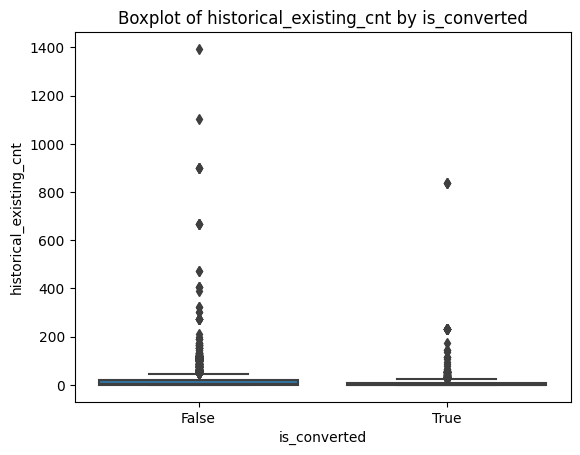

In [23]:
### Boxplot
sns.boxplot(x='is_converted', y='historical_existing_cnt', data=df)
plt.xlabel('is_converted')
plt.ylabel('historical_existing_cnt')
plt.title('Boxplot of historical_existing_cnt by is_converted')
plt.show()

C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


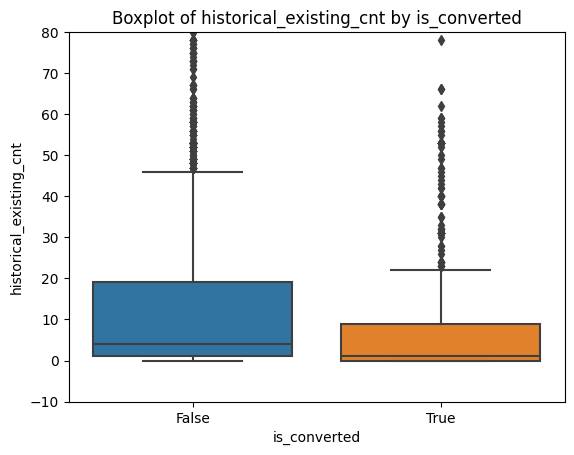

In [24]:
### Boxplot (y lim)
sns.boxplot(x='is_converted', y='historical_existing_cnt', data=df)
plt.ylim(-10, 80)
plt.xlabel('is_converted')
plt.ylabel('historical_existing_cnt')
plt.title('Boxplot of historical_existing_cnt by is_converted')
plt.show()

In [25]:
### 구간별 비교
df['historical_existing_cnt_bins'] = pd.cut(df['historical_existing_cnt'].to_numpy(), bins=[0,25,50,100,150,200])

conversion_ratio_by_bin = df.groupby('historical_existing_cnt_bins')['is_converted'].value_counts().unstack()

print(conversion_ratio_by_bin)

is_converted                  False  True 
historical_existing_cnt_bins              
(0, 25]                        9548    257
(25, 50]                        304     50
(50, 100]                       223     27
(100, 150]                     1296      7
(150, 200]                       20      1


C:\Users\Kyeongjun\AppData\Local\Temp\ipykernel_14860\4219601687.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_ratio_by_bin = df.groupby('historical_existing_cnt_bins')['is_converted'].value_counts().unstack()


# response_corporate

### <EDA 요약>  
담당 자사 법인명  
법인에 따라 구매 전환율이 크게 다름.  
  
총평 : 데이터가 시계열인지를 확인했을 때, 맞다면 최근 구매 여부를 다시 확인해보고, 아니라면 구매 전환율을 변수로 잡아도 졸을듯?

In [26]:
print(df['response_corporate'].unique())
print(f"법인 수 : {df['response_corporate'].unique().shape[0]}")

['LGEPH' 'LGEIL' 'LGEAF' 'LGESJ' 'LGESL' 'LGESP' 'LGEGF' 'LGESA' 'LGEUS'
 'LGECB' 'LGEMS' 'LGEEG' 'LGEEF' 'LGEAP' 'LGEIN' 'LGEUK' 'LGEKR' 'LGEPS'
 'LGECI' 'LGECL' 'LGETK' 'LGELF' 'LGEPT' 'LGEPR' 'LGEDG' 'LGERO' 'LGEMK'
 'LGEPL' 'LGECZ' 'LGEES' 'LGEAR' 'LGEHK' 'LGEML' 'LGEJP' 'LGEHS' 'LGEAS'
 'LGEYK' 'LGEIS' 'LGEBN' 'LGEFS' 'LGESW' 'LGEMC' 'LGEAG' 'LGEEB' 'LGETH'
 'LGEVH' 'LGECH' 'LGELA' 'LGETT' 'LGERA' 'LGEUR' 'LGEIR' 'LGEBT']
법인 수 : 53


In [27]:
df['response_corporate'].value_counts()

response_corporate
LGEIL    16908
LGESP     9311
LGEUS     5955
LGEMS     2768
LGEPH     2651
LGEGF     2149
LGECB     2079
LGEUK     1651
LGESJ     1469
LGECL     1339
LGEPS     1252
LGEIS     1146
LGEPR     1131
LGEDG     1051
LGEPL      850
LGEEG      704
LGEVH      614
LGEES      592
LGETK      541
LGEAR      491
LGEKR      433
LGEHK      383
LGEAP      366
LGESL      348
LGEMK      331
LGEFS      302
LGEAF      288
LGEIN      281
LGELF      274
LGESA      268
LGECI      263
LGETH      185
LGEEF      159
LGEPT      111
LGEML      110
LGEBN       99
LGEYK       78
LGECH       65
LGEHS       51
LGETT       47
LGEJP       41
LGEAS       33
LGESW       31
LGEMC       30
LGERO       29
LGEEB       13
LGEAG        8
LGERA        8
LGECZ        7
LGELA        2
LGEUR        1
LGEIR        1
LGEBT        1
Name: count, dtype: int64

C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


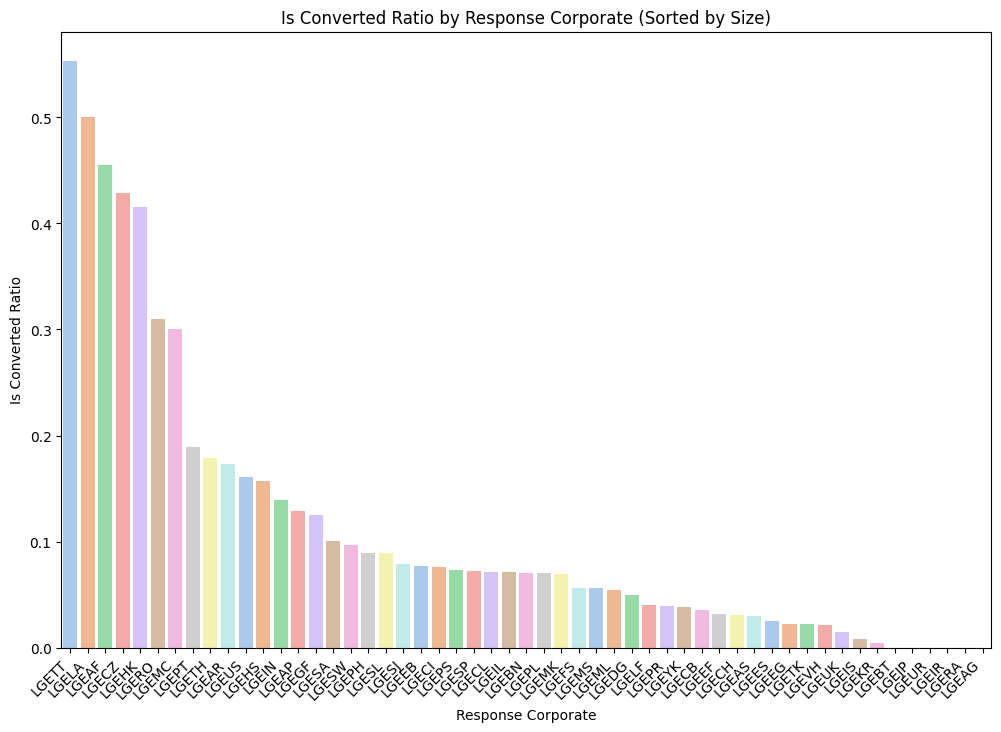

In [28]:
### 클래스별 is_converted 비율
class_conversion_ratio = df.groupby('response_corporate')['is_converted'].mean().reset_index()

class_conversion_ratio_sorted = class_conversion_ratio.sort_values(by='is_converted', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='response_corporate', y='is_converted', data=class_conversion_ratio_sorted, palette='pastel')
plt.xlabel('Response Corporate')
plt.ylabel('Is Converted Ratio')
plt.title('Is Converted Ratio by Response Corporate (Sorted by Size)')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.show()

# lead_owner

### <EDA 요약>  
영업 담당자 이름  
영업 성공 비율을 확인 가능하긴 한데 담당자가 너무 많음  
+ 시계열이라면 영업을 시작한 기간 때문에 성공 비율을 쓰기 어려울 수 있을 것 같음  
  
총평 : 어떻게 사용할지 잘 모르겠다.

In [29]:
# print(df['lead_owner'].unique())
print(f"영업 담당자 수 : {df['lead_owner'].unique().shape[0]}")

영업 담당자 수 : 984


In [30]:
df['lead_owner'].value_counts()

lead_owner
174    4627
175    4120
97     2499
23     2453
194    2208
       ... 
481       1
909       1
979       1
111       1
756       1
Name: count, Length: 984, dtype: int64

In [31]:
### 클래스별 is_converted 비율
class_conversion_ratio = df.groupby('lead_owner')['is_converted'].mean().reset_index()

class_conversion_ratio_sorted = class_conversion_ratio.sort_values(by='is_converted', ascending=False).reset_index(drop=True)

print(class_conversion_ratio_sorted)

     lead_owner  is_converted
0           631           1.0
1           931           1.0
2           496           1.0
3           937           1.0
4           779           1.0
..          ...           ...
979         198           0.0
980         665           0.0
981         664           0.0
982         663           0.0
983        1114           0.0

[984 rows x 2 columns]
